In [ ]:
#####################    Movies Datasets    #############################################################

In [2]:
%matplotlib notebook
import pandas as pd  #load csv files, to_numeric, to_datetime, etc
import numpy as np #useful functions
from sklearn.cluster import KMeans
#import pyplot from matplotlib for data visualisation
from matplotlib import pyplot as plt
#import Axes3D for some of the 3D visualisation
from mpl_toolkits.mplot3d import Axes3D  
import ast #convert string as object to iterate over the complex structure

#importing Movies_metadata file
mov = pd.read_csv('/media/mohinfo/data/movies_metadata.csv')


/home/mohinfo/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
mov['belongs_to_collection'].head(10)

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                  NaN
4    {'id': 96871, 'name': 'Father of the Bride Col...
5                                                  NaN
6                                                  NaN
7                                                  NaN
8                                                  NaN
9    {'id': 645, 'name': 'James Bond Collection', '...
Name: belongs_to_collection, dtype: object

In [81]:
mov.columns

Index([u'adult', u'belongs_to_collection', u'budget', u'genres', u'homepage',
       u'id', u'imdb_id', u'original_language', u'original_title', u'overview',
       u'popularity', u'poster_path', u'production_companies',
       u'production_countries', u'release_date', u'revenue', u'runtime',
       u'spoken_languages', u'status', u'tagline', u'title', u'video',
       u'vote_average', u'vote_count', u'Unnamed: 24', u'Unnamed: 25',
       u'Unnamed: 26', u'Unnamed: 27'],
      dtype='object')

In [48]:
## there are four unnamed columns, keep them for now
## to see if they add some meaning  


mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27612 entries, 0 to 27611
Data columns (total 29 columns):
adult                    27612 non-null object
belongs_to_collection    3138 non-null object
budget                   27611 non-null float64
genres                   27612 non-null object
homepage                 4467 non-null object
id                       27612 non-null object
imdb_id                  27600 non-null object
original_language        27609 non-null object
original_title           27612 non-null object
overview                 27342 non-null object
popularity               27536 non-null float64
poster_path              27465 non-null object
production_companies     27610 non-null object
production_countries     27610 non-null object
release_date             27581 non-null object
revenue                  27609 non-null object
runtime                  27537 non-null float64
spoken_languages         27609 non-null object
status                   27574 non-null obje

In [4]:
## discover datatypes of dataset

mov.dtypes


adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                   object
runtime                   object
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average              object
vote_count                object
Unnamed: 24               object
Unnamed: 25               object
Unnamed: 26              float64
Unnamed: 27              float64
dtype: object

In [4]:
## I create an additional column 'yyyy' because by exploring the dataset, the only one date type column
# is 'release_date',  the datetime format by calling pd.to_datetime()
## so we keep consistency

mov.head(2)
mov['yyyy'] = pd.to_datetime(mov['release_date'], errors = 'coerce')
mov['yyyy'].dt.year.tail(10)

27602    2009.0
27603    2013.0
27604    2014.0
27605    1998.0
27606    1983.0
27607    1993.0
27608    1994.0
27609    1936.0
27610    1972.0
27611       NaN
Name: yyyy, dtype: float64

In [84]:

mov['original_language'].sample(10)

3907     en
7385     en
17306    en
20029    fr
5309     en
19865    en
24805    de
21545    fr
20583    en
1272     en
Name: original_language, dtype: object

In [2]:
#displaying values from unnamed columns ---> NAN
mov.iloc[:, 24:27]

#movid['revenue'].head(10)

,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [3]:
#movid.loc[:,:].corr(method='pearson') !!!! No.. only with numerical values



In [76]:
mov['release_date'].sample(5)

5767     2002-09-01
12455    2007-01-01
4182     2001-05-21
659      1959-05-01
8812     1983-03-25
Name: release_date, dtype: object

In [38]:
mov['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'query=The%20Year%20My', 'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr',
       'is', 'ps', 'ab', 'eo', 'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la',
       'et', 'ku', 'fy', 'lv', 'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg',
       'mr', 'lt', 'kk', 'ms', 'sq', nan, '104', 'qu', 'te', 'am', 'jv',
       'tg', 'ml', 'hr', 'lo', 'ay', 'kn'], dtype=object)

In [6]:
# which kind of movies (longer periods or shorter periods) are more popular?
# To answer that i need to check the correlation between "popularity" and "runtime" features
# first, i need to convert type "object" to a numerical one

# there is a prblm at line 3213 where there is an invalid parsing,
#the error type:
                 #If ‘raise’, then invalid parsing will raise an exception
                 #If ‘coerce’, then invalid parsing will be set as NaN   <<<<<<<<
                 #If ‘ignore’, then invalid parsing will return the input
#a solution wil be to use:
# errors = coerce in order to impose consistency 
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')
mov['popularity'] = pd.to_numeric(mov['popularity'], errors = 'coerce')


In [49]:
## By using scatter plot we can see that average runtime movies attract more people

<IPython.core.display.Javascript object>


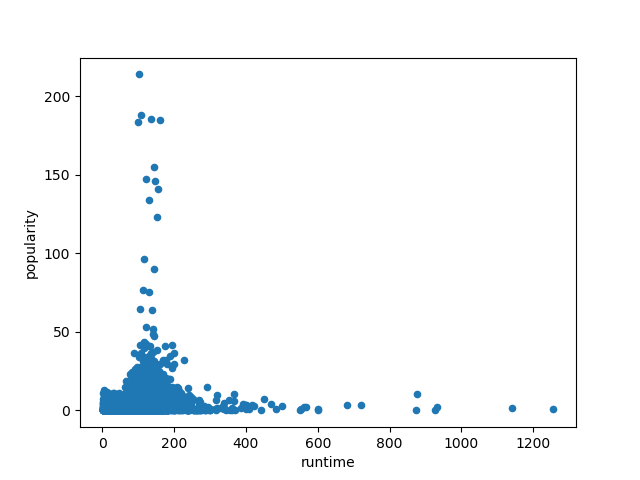

In [5]:
mov.plot.scatter(x='runtime', y='popularity')
# Movies 

In [77]:
#movid['release_date'].head(20)

# Define similarities between movies released in mainly the same period

# by exploring the dataset, we can see that there are a lot of movies released in same YEAR 
##########   #########




In [78]:

#mov['yyyy'].dt.year/month/day

<IPython.core.display.Javascript object>


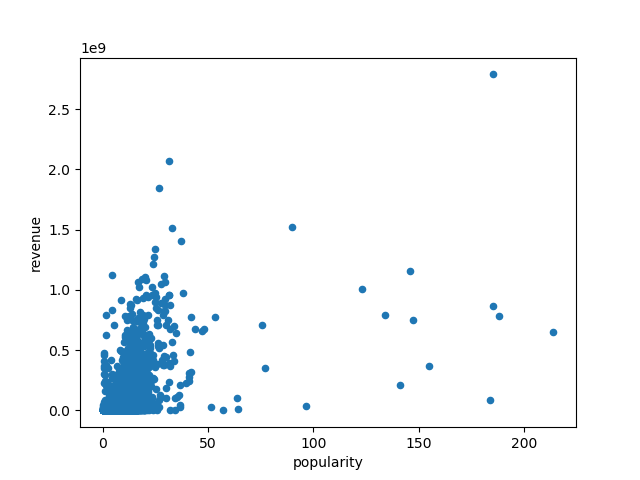

In [8]:
#### popularity and revenue ###################

mov['revenue'] = pd.to_numeric(mov['revenue'], errors = 'coerce')
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')
mov['popularity'] = pd.to_numeric(mov['popularity'], errors = 'coerce)
mov.plot.scatter(x='popularity', y='revenue')


<IPython.core.display.Javascript object>


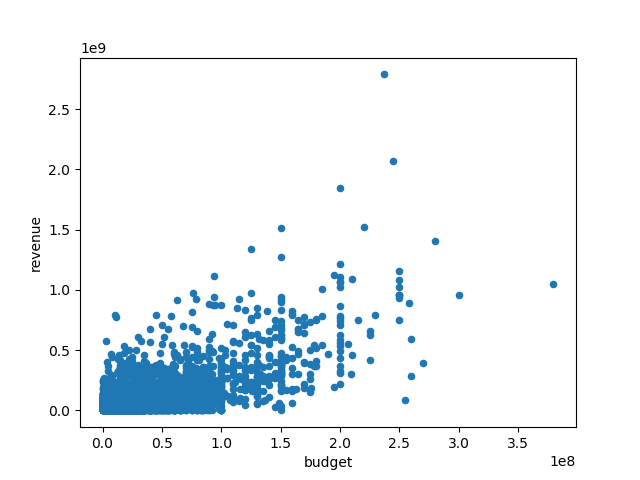

In [57]:
mov['popularity'] = pd.to_numeric(mov['popularity'], errors = 'coerce')
mov['budget'] = pd.to_numeric(mov['budget'], errors = 'coerce')
mov['revenue'] = pd.to_numeric(mov['revenue'], errors = 'coerce')

mov.plot.scatter(x='budget', y='revenue')

In [27]:
#budget, revenue & runtime
# the problem on this vizualisation is the displaying capacity of the array which must be somehow limited



mov['revenue'] = pd.to_numeric(mov['revenue'], errors = 'coerce')
mov['budget'] = pd.to_numeric(mov['budget'], errors = 'coerce')
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')

mov =mov.iloc[0:20,[2,15,16]].to_numpy()

kmeans = KMeans(n_clusters=3, random_state=0)
 
#fitting input data
kmeans.fit(mov)

#getting clusters labels "predicting the clusters"
kmeans.predict(mov.iloc[0:24, [2,15,16]])



array([0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 1])

In [29]:
#movid['original_language'].sample(10).unique()

<IPython.core.display.Javascript object>


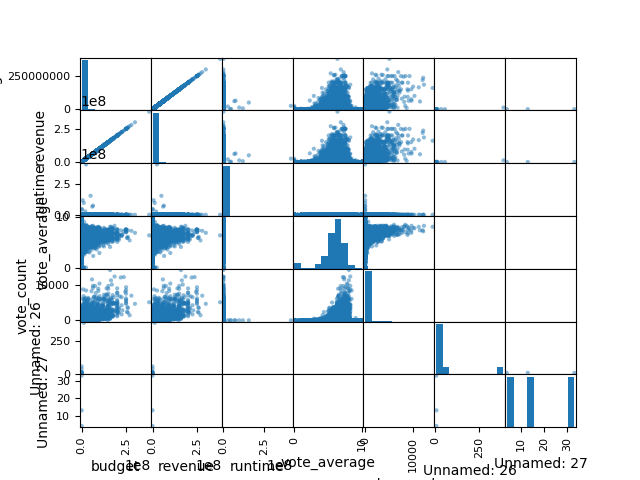

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa4eb25cc>,
      dtype=object)

In [6]:
mov['vote_count'] = pd.to_numeric(mov['vote_count'], errors = 'coerce')
mov['vote_average'] = pd.to_numeric(mov['vote_average'], errors = 'coerce')
mov['revenue'] = pd.to_numeric(mov['budget'], errors = 'coerce')
mov['budget'] = pd.to_numeric(mov['revenue'], errors = 'coerce')
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')

pd.plotting.scatter_matrix(mov)



In [18]:
# THe unnamed columns are meaningless --> drop them
mov.drop(['Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], inplace=True, axis=1)

In [19]:
## visualize some statistical values of movies quantitive data

num_vals = pd.DataFrame(mov.describe().transpose())
num_vals

,count,mean,std,min,25%,50%,75%,max
budget,27611.0,6.052828e+06,2.051260e+07,0.0,0.000000,0.00000,223.500000,3.800000e+08
popularity,27536.0,3.671219e+00,5.490914e+00,0.0,0.597438,1.72788,5.584961,2.138499e+02
revenue,27611.0,6.052828e+06,2.051260e+07,0.0,0.000000,0.00000,223.500000,3.800000e+08
runtime,27537.0,3.809546e+04,2.907490e+06,0.0,88.000000,97.00000,109.000000,4.128000e+08
vote_average,27528.0,5.826646e+00,1.671062e+00,0.0,5.300000,6.10000,6.800000,1.000000e+01
vote_count,27593.0,1.531784e+02,5.889798e+02,0.0,5.000000,15.00000,59.000000,1.407500e+04


<IPython.core.display.Javascript object>


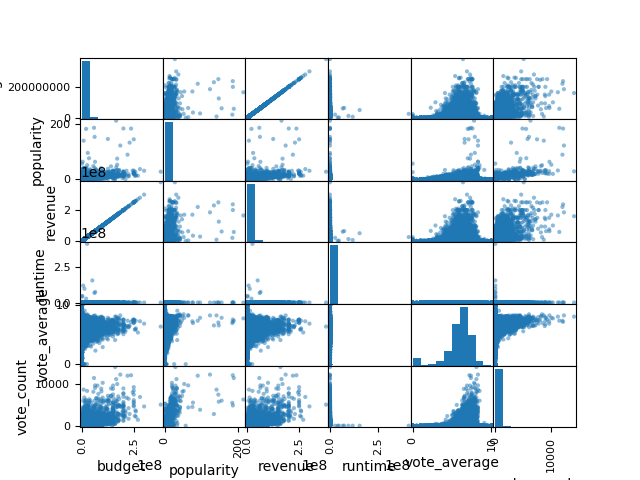

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa4a843ac>,
      dtype=object)

In [37]:
mov['vote_count'] = pd.to_numeric(mov['vote_count'], errors = 'coerce')
mov['vote_average'] = pd.to_numeric(mov['vote_average'], errors = 'coerce')
mov['revenue'] = pd.to_numeric(mov['budget'], errors = 'coerce')
mov['budget'] = pd.to_numeric(mov['revenue'], errors = 'coerce')
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')
mov['popularity'] = pd.to_numeric(mov['popularity'], errors = 'coerce')


pd.plotting.scatter_matrix(mov)


<IPython.core.display.Javascript object>


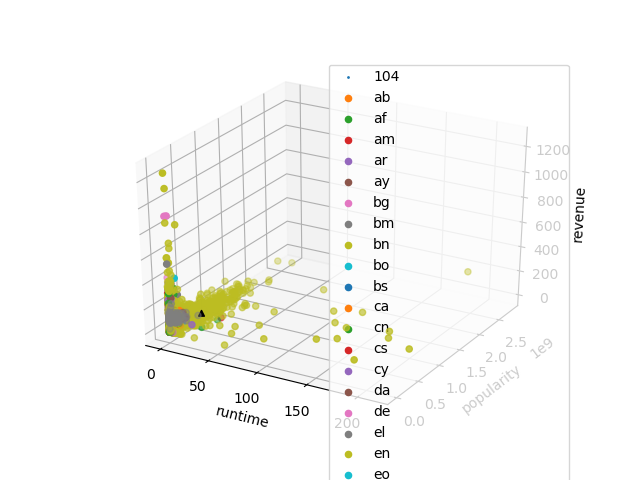

In [56]:
### K-means
#Having the observation 'original language', i want to train runtime, revenue, popularity data
# in order to form clusters based on  observation

mov['popularity'] = pd.to_numeric(mov['popularity'], errors = 'coerce')
mov['revenue'] = pd.to_numeric(mov['revenue'], errors = 'coerce')
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')



from sklearn.cluster import KMeans

mov = mov.iloc[:20,[10,15,16]].to_numpy()
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(movf)
kmeans.predict(mov.iloc[:4,[10,15,16]])

centres = kmeans.cluster_centers_

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = mov.groupby(by='original_language')

axis.set_xlabel('runtime')
axis.set_ylabel('popularity')
axis.set_zlabel('revenue')

for name, group in groups:
    axis.scatter(group.popularity, group.revenue, group.runtime, label=name)

axis.scatter(centres[:,0], centres[:,1], centres[:,2], marker='^', color='k', s=17, alpha=1)
    
axis.legend()
plt.show()

In [61]:
# Most popular movies 

# most popular movies are in english

mov[mov['popularity'].notnull()][['original_language', 'title', 'popularity']].sort_values('popularity', ascending = False).head(3)

,original_language,title,popularity
24455,en,Big Hero 6,213.849907
26564,en,Deadpool,187.860492
26566,en,Guardians of the Galaxy Vol. 2,185.330992


In [18]:
#movies  << for adults 
movid[movid['adult'] == "True"][['title', 'revenue', 'id']]
#--->  One

,title,revenue,id
19489,Erotic Nights of the Living Dead,0,5422


In [62]:
#movies  << are for everyone 
mov[mov['adult'] == 'False'][['title', 'revenue', 'id']]


,title,revenue,id
0,Toy Story,373554033.0,862
1,Jumanji,262797249.0,8844
2,Grumpier Old Men,0.0,15602
3,Waiting to Exhale,81452156.0,31357
4,Father of the Bride Part II,76578911.0,11862
5,Heat,187436818.0,949
6,Sabrina,0.0,11860
7,Tom and Huck,0.0,45325
8,Sudden Death,64350171.0,9091
9,GoldenEye,352194034.0,710


In [27]:
mov[mov['yyyy'].dt.year > 2014][['title']].count()

title    39
dtype: int64

In [14]:
mov[mov['yyyy'].dt.year < 2014][['title']].count()

title    26814
dtype: int64

<IPython.core.display.Javascript object>


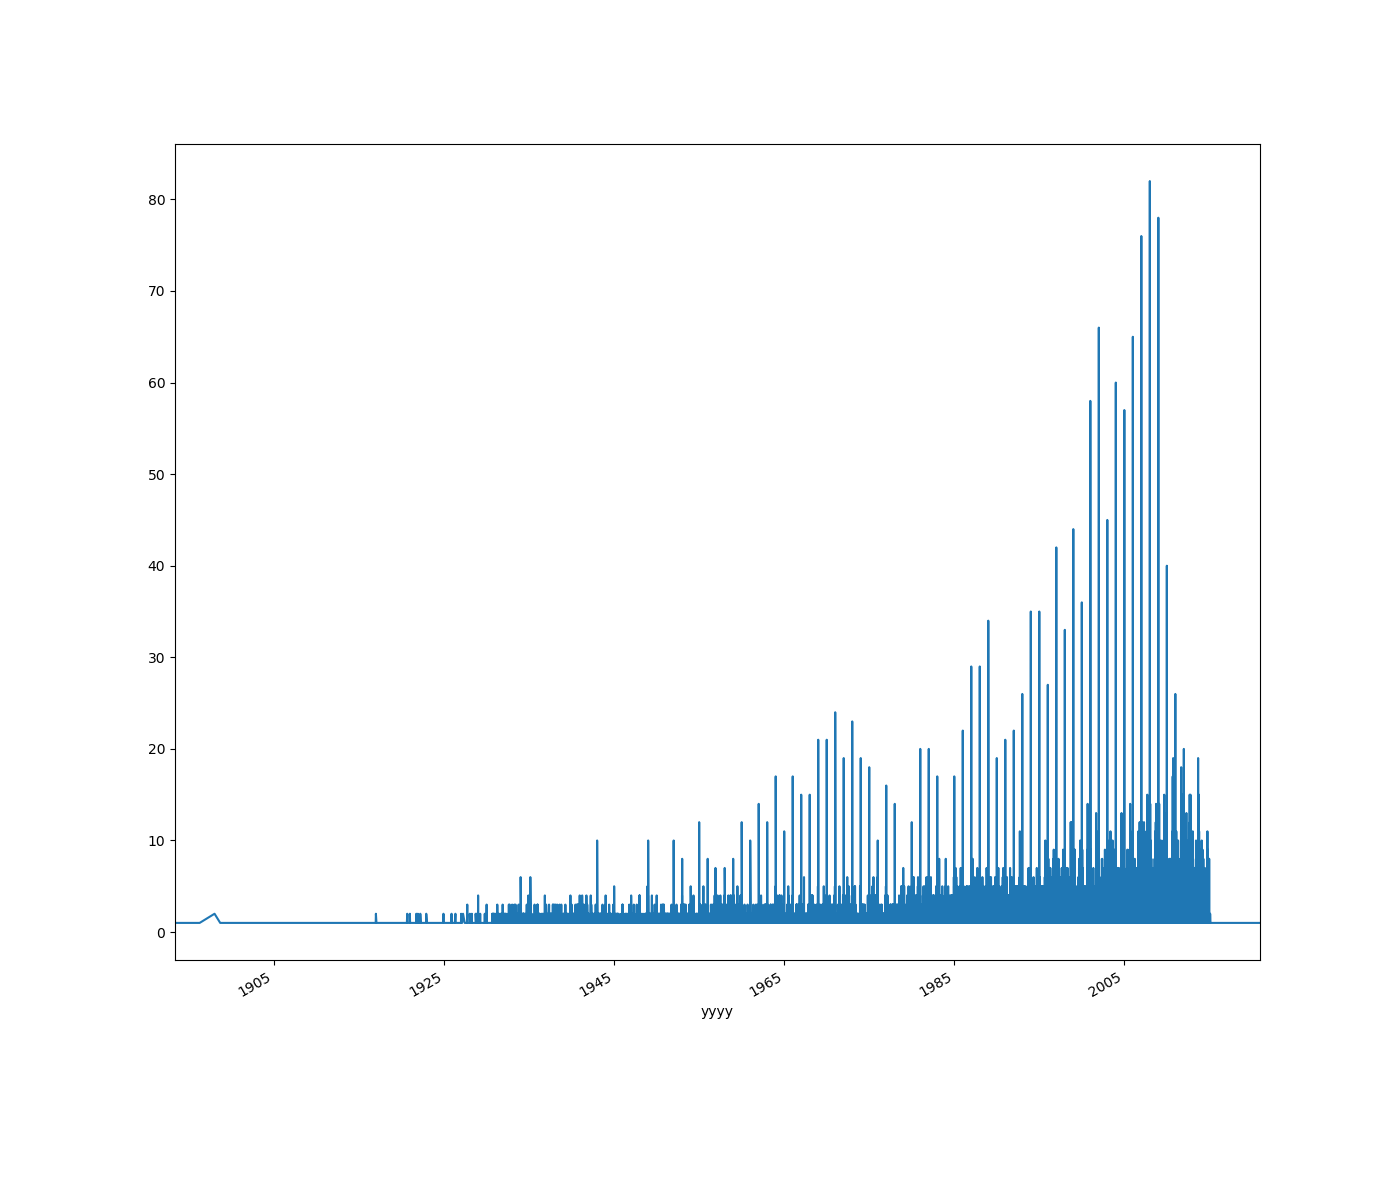

In [68]:
### Movies budget variation upon the years ###

movies_year_bdg = mov.groupby('yyyy')['budget'].count()
movies_year_bdg.plot(figsize =(14,12))

<IPython.core.display.Javascript object>


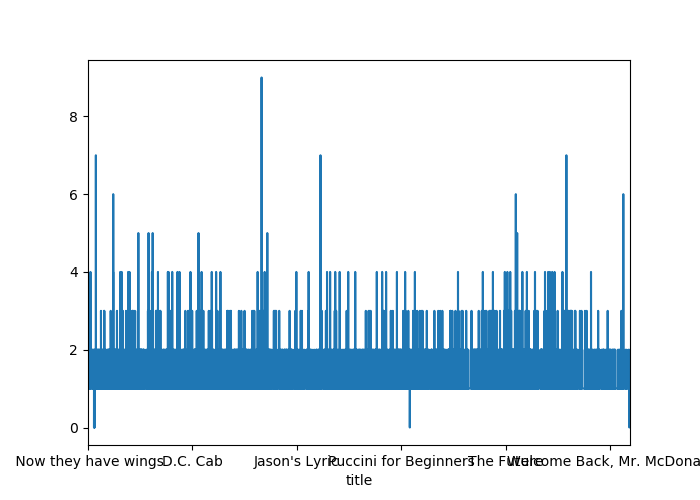

In [41]:
# all, do movies have been appreciated by people?
#<< Overmovies with high average vote_count

movies_vot_averg = mov.groupby('title')['vote_count'].count()
movies_vot_averg.plot(figsize =(7,5))

<IPython.core.display.Javascript object>


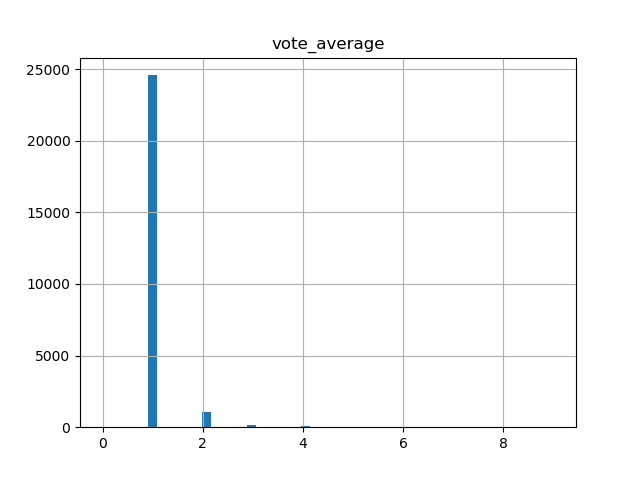

                                                    adult  \
title                                                       
 Now they have wings                                    1   
 The Staggering Odds!                                   1   
 an age of fantasy and magic...                         1   
 being there is all of it!                              1   
 one day can ruin your life. All life is is fou...      1   
 she's got 30 days!                                     1   
 so can sin!                                            1   
 unfortunately he was a girl.                           1   
!Women Art Revolution                                   1   
#chicagoGirl                                            1   
$5 a Day                                                1   
$9.99                                                   1   
$ellebrity                                              1   
'71                                                     1   
'Neath the Arizona Skies

In [94]:
##### histogram for movies according to their release dates
mov['vote_average'] = pd.to_numeric(mov['vote_average'], errors = 'coerce')
mov['vote_count'] = pd.to_numeric(mov['vote_count'], errors = 'coerce')

hist_aver_vote = mov.groupby('original_languages').count()
hist_aver_vote.hist(column='vote_average', bins=50)
print(hist_aver_vote)



#### overall, the majority of movies had a high vote_average

<IPython.core.display.Javascript object>


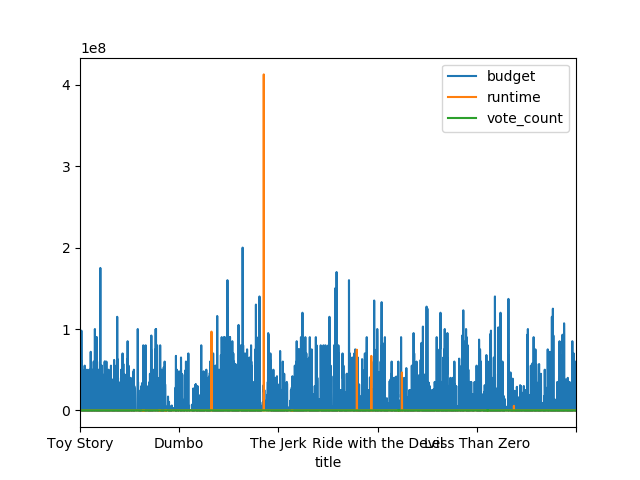

In [5]:
movid['vote_count'] = pd.to_numeric(movid['vote_count'], errors = 'coerce')
movid['popularity'] = pd.to_numeric(movid['popularity'], errors = 'coerce')
movid['budget'] = pd.to_numeric(movid['budget'], errors = 'coerce')
movid['runtime'] = pd.to_numeric(movid['runtime'], errors = 'coerce')

mov=movid[:5000]
mov.plot('title',[2,15,16,23],kind='line')

<IPython.core.display.Javascript object>


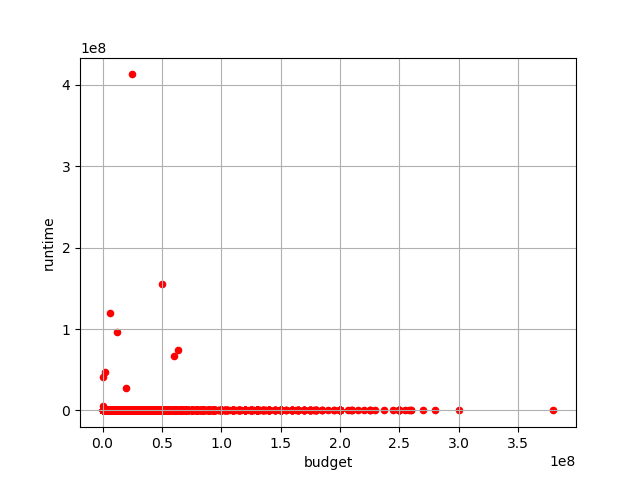

In [9]:
mov['budget'] = pd.to_numeric(mov['budget'], errors = 'coerce')
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')

mov.plot(x='budget',y='runtime',kind='scatter',color='R',grid=True)

In [89]:
#let's explore production countries 

import ast 

####  
####  production_countries may be np.nan values
k = 0
cprod_name = []
for i,j in mov.iterrows():
    if j['production_countries'] is not np.nan:
        elmts = j['production_countries']
        for k in elmts:
    
            if k[0] not in cprod_name:
                cprod_name.append(k)
print(cprod_name)

# I need to delete '[' to process the different fields as a list at least

['[', '{', "'", 'i', 's', 'o', '_', '3', '1', '6', ':', ' ', 'U', 'S', ',', 'n', 'a', 'm', 'e', 't', 'd', 'f', 'A', 'r', 'c', '}', ']', 'D', 'E', 'G', 'y', 'B', 'K', 'g', 'F', 'R', 'I', 'T', 'l', 'p', 'C', 'N', 'h', 'u', 'Z', 'H', 'w', 'z', 'J', 'P', 'L', 'O', 'b', 'M', 'W', 'X', 'x', 'k', '4', 'v', '2', '8', '5', '7', '9', '-', '\xc3', '\x89', '\xa9', 'V', '0', '.', 'Y', '(', ')', '/', 'j', '"', 'Q', 'q', '\xe2', '\x80', '\xa6', '\xc2', '\xb0']


In [91]:
## To fix that, I choose to group all the names "which is an expressive feature", 
## in each column so that the exploration will be much easier 
import json
mov['production_countries'][0]

def List(cols):
   
    lst = []
    for co in cols:
        lst.append(co['name'])
    return lst


In [12]:
mov.columns

Index([u'adult', u'belongs_to_collection', u'budget', u'genres', u'homepage',
       u'id', u'imdb_id', u'original_language', u'original_title', u'overview',
       u'popularity', u'poster_path', u'production_companies',
       u'production_countries', u'release_date', u'revenue', u'runtime',
       u'spoken_languages', u'status', u'tagline', u'title', u'video',
       u'vote_average', u'vote_count', u'Unnamed: 24', u'Unnamed: 25',
       u'Unnamed: 26', u'Unnamed: 27', u'yyyy'],
      dtype='object')

<IPython.core.display.Javascript object>


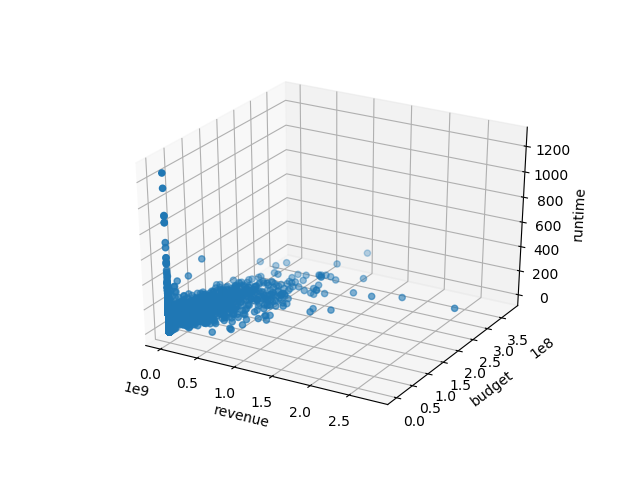

Text(0.5,0,'runtime')

In [101]:
# a Higher budget is followed generally by a higher revenue --> good quality, materials, etc
# Which may attract more viewers
# However, just few instances of long runtime movies which came with a high revenue,
# the ideal runtime is limited to 200 minutes


mov['revenue'] = pd.to_numeric(mov['revenue'], errors = 'coerce')
mov['budget'] = pd.to_numeric(mov['budget'], errors = 'coerce')
mov['runtime'] = pd.to_numeric(mov['runtime'], errors = 'coerce')


fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

axis.scatter(mov.iloc[:,15], mov.iloc[:,2], mov.iloc[:,16])
axis.set_xlabel('revenue')
axis.set_ylabel('budget')
axis.set_zlabel('runtime')